Reference = https://mubaris.com/posts/linear-regression/

# Simple Linear Regression

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [0]:
data = pd.read_csv('./sample_data/headbrain.csv')
data.shape

(237, 4)

In [0]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values



---

Find the values β1 and β0, we will need mean of X and Y. We will find these and the coeffients

In [0]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [0]:
m = len(X)
m

237

In [0]:
# Calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

In [0]:
# Print Coefficient
print(b1, b0)

0.26342933948939945 325.57342104944223




---

**BrainWeight = 325.573421049 + 0.263429339489 ∗ HeadSize**

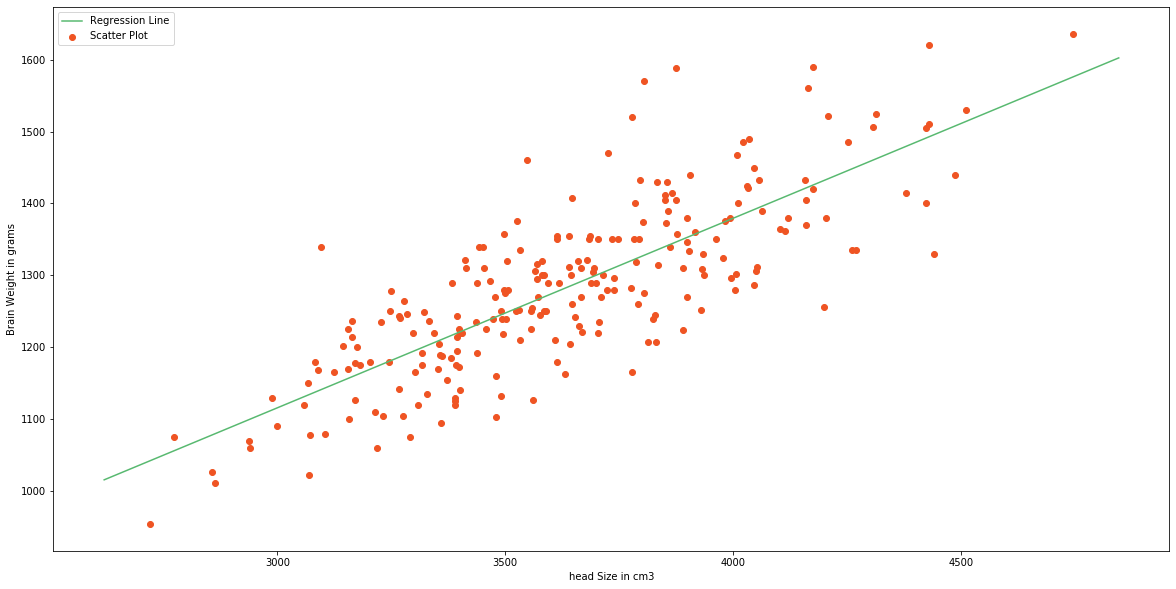

In [0]:
# Plotting Values and Regession Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculate line x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Plotting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()



---

There are many methods to evaluate models. We will use **Root Mean Squared Error** and Coefficient of Determination. Now we will find RMSE.

In [0]:
# Calculate RMSE
rmse = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  rmse += (Y[i] - y_pred) **2

rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


R2 Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find R2 Score

In [0]:
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# Single with scikit-learn

Let’s see how we can build this Simple Linear Regression Model using scikit-learn.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))

# create model
reg = LinearRegression()

# fitting training data
reg = reg.fit(X, Y)

# Y Prediction
Y_pred = reg.predict(X)

# claculate RMSE adn R2 score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


# Multiple Linear Regression

Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has `n` features.

Cost bascially gives the error in our model. Y in above equation is the our hypothesis(approximation). By minimizing this cost function, we can get find β.

**Gradient Descent Step**

1.   Initialize values β0,β1,…,βn with some value. In this case we will initialize with 0.
2.   Iteratively update, until it converges.



In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [0]:
data = pd.read_csv('./sample_data/student.csv')
data.shape

(1000, 3)

In [0]:
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


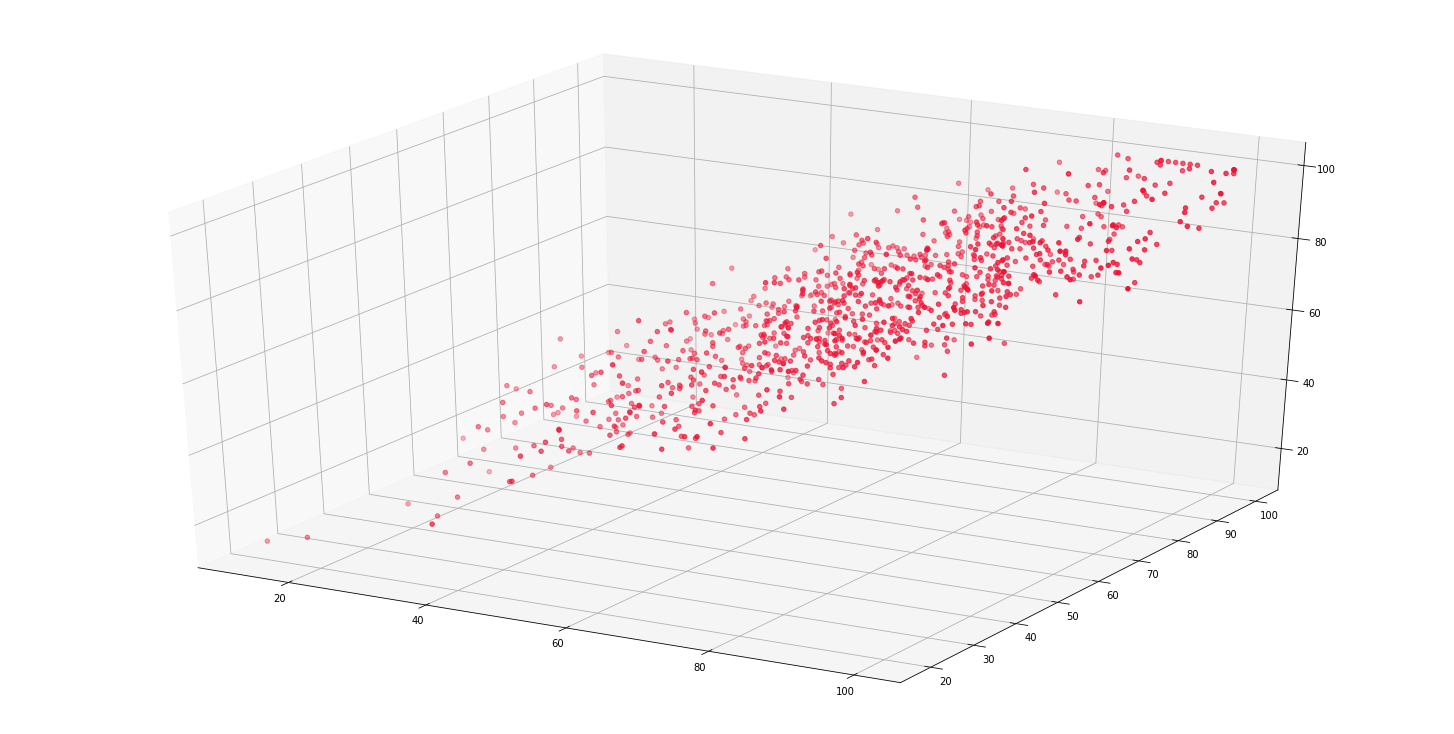

In [0]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Plotting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [0]:
# generate our X, Y and β.
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T

# Initial Coeficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [0]:
# cost function
def cost_function(X, Y, B):
  m = len(Y)
  J = np.sum((X.dot(B) - Y) ** 2) / (2 * m)
  return J

initial_cost = cost_function(X, Y, B)
print(initial_cost)

2470.11


In [0]:
# Reduce cost prediocally using Gradient Descent.
def gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)

  for iteration in range(iterations):
    h = X.dot(B) # Hypotesis Values
    loss = h - Y
    # Gradient Calculation
    gradient = X.T.dot(loss) / m
    # Changing Values of B Using Gradient
    B = B - alpha * gradient
    # New Cost Values
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost

  return B, cost_history

In [0]:
# compute final value of β

# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539169


The model is:

**Swriting = −0.47889172 + 0.09137252 ∗ Smath + 0.90144884 ∗ Sreading**

Then calculate RMSE and R2 Score of our model to evaluate.

In [0]:
# model evaluation - RMSE
def rmse(Y, Y_pred):
  rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
  return rmse

# model evaluation - R2 Score
def r2_score(Y, Y_pred):
  mean_Y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9999857931018732


# Multiple with sciket-learn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Initialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Perdiction
Y_pred = reg.predict(X)

# model evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316
